# Lending Club Loan Data Analysis

DESCRIPTION

Create a model that predicts whether or not a loan will be default using the historical data.

Problem Statement:  

For companies like Lending Club correctly predicting whether or not a loan will be a default is very important. In this project, using the historical data from 2007 to 2015, you have to build a deep learning model to predict the chance of default for future loans. As you will see later this dataset is highly imbalanced and includes a lot of features that makes this problem more challenging.DESCRIPTION

Create a model that predicts whether or not a loan will be default using the historical data.

 

Problem Statement:  

For companies like Lending Club correctly predicting whether or not a loan will be a default is very important. In this project, using the historical data from 2007 to 2015, you have to build a deep learning model to predict the chance of default for future loans. As you will see later this dataset is highly imbalanced and includes a lot of features that makes this problem more challenging.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# load the data
df = pd.read_csv('./resources/loan_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [5]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [6]:
# check for null values
assert(df.isnull().sum().sum()==0)

No null values in our dataset

## EDA

In [7]:
df['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

In [8]:
import seaborn as sns

c:\Users\of6cef\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


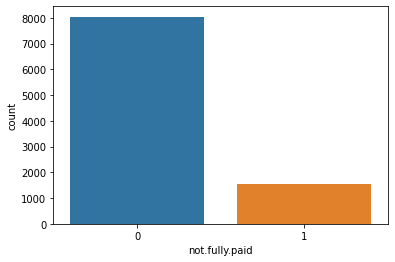

In [9]:
sns.countplot(df['not.fully.paid'])
plt.show()

Data is imbalanced

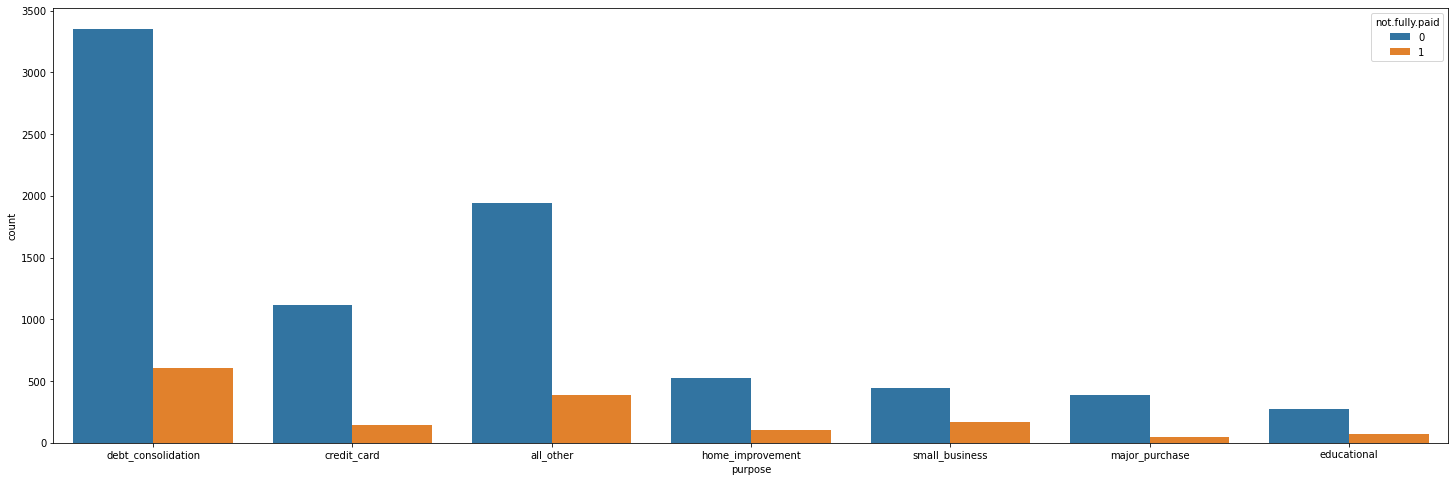

In [10]:
# check for class balance across the purpose
plt.figure(figsize=(25,8))
sns.countplot(x='purpose', hue='not.fully.paid', data=df)
plt.show()

<Figure size 1800x576 with 0 Axes>

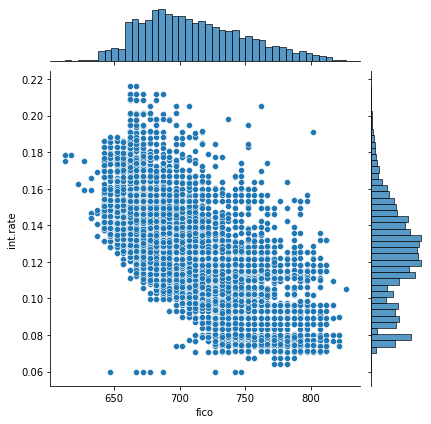

In [14]:
plt.figure(figsize=(25,8))
sns.jointplot(x='fico', y='int.rate', data=df)
plt.show()

### handle imbalanced data

In [18]:
not_fully_paid_0 = df[df['not.fully.paid'] == 0]
not_fully_paid_1 = df[df['not.fully.paid'] == 1]

In [24]:
# resample
from sklearn.utils import resample
df_minor_upsampled = resample(not_fully_paid_1, replace=True, n_samples=not_fully_paid_0.index.size)

In [32]:
df_minor_upsampled

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
5126,1,educational,0.1461,137.91,10.915016,3.16,667,7410.000000,3864,52.9,2,0,0,1
4699,1,home_improvement,0.1253,510.37,10.858999,10.96,722,6270.000000,2652,3.9,0,0,0,1
4874,1,debt_consolidation,0.1183,497.01,11.054429,15.87,732,8460.000000,26127,44.8,1,0,0,1
1304,1,debt_consolidation,0.1146,263.66,11.289782,21.72,697,7577.000000,73150,72.9,0,0,0,1
5247,1,all_other,0.1253,83.67,9.639522,20.63,697,1560.000000,1163,14.7,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3540,1,all_other,0.1379,340.76,10.373616,15.49,677,2339.958333,15968,47.8,3,0,0,1
9147,0,all_other,0.1600,175.79,10.833681,5.82,677,3029.958333,49082,0.0,0,0,0,1
8431,0,debt_consolidation,0.1861,185.95,11.083680,29.20,652,8759.958333,18545,86.3,1,0,0,1
9291,0,debt_consolidation,0.1357,475.56,11.041321,19.25,707,5940.000000,12177,75.6,5,0,0,1


In [26]:
new_df = pd.concat([not_fully_paid_0,df_minor_upsampled])

In [30]:
new_df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
1378,1,educational,0.0800,297.70,10.915088,3.53,787,14159.958330,7171,10.7,2,0,0,1
5880,1,debt_consolidation,0.0774,280.97,10.422638,15.10,782,10770.041670,8880,17.0,0,0,0,1
8138,0,small_business,0.1172,793.94,11.849398,8.39,707,5280.041667,16298,80.7,8,0,0,1
6826,1,debt_consolidation,0.1461,120.67,9.852868,5.24,662,3360.041667,1418,28.9,2,0,0,1
8578,0,home_improvement,0.1766,163.72,10.819778,24.46,647,5790.000000,16723,70.6,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3979,1,all_other,0.1284,47.07,8.494539,17.68,722,2100.000000,0,2.5,3,0,0,0
3198,1,debt_consolidation,0.1126,407.51,10.696390,7.96,722,3749.958333,12656,71.9,0,0,0,0
2861,1,all_other,0.1442,51.58,11.002100,12.04,667,3719.958333,2287,47.6,1,0,0,1
8918,0,small_business,0.1189,397.97,11.350407,7.31,722,4380.000000,29669,56.8,5,0,0,1


In [28]:
from sklearn.utils import shuffle
new_df = shuffle(new_df)

In [29]:
new_df['not.fully.paid'].value_counts()

1    8045
0    8045
Name: not.fully.paid, dtype: int64

class is now balanced

### Feature Transformation

Transform categorical values into numerical values

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in new_df.select_dtypes(include='object'):
  new_df[i] = le.fit_transform(new_df[i])

In [44]:
new_df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
1378,1,3,0.0800,297.70,10.915088,3.53,787,14159.958330,7171,10.7,2,0,0,1
5880,1,2,0.0774,280.97,10.422638,15.10,782,10770.041670,8880,17.0,0,0,0,1
8138,0,6,0.1172,793.94,11.849398,8.39,707,5280.041667,16298,80.7,8,0,0,1
6826,1,2,0.1461,120.67,9.852868,5.24,662,3360.041667,1418,28.9,2,0,0,1
8578,0,4,0.1766,163.72,10.819778,24.46,647,5790.000000,16723,70.6,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3979,1,0,0.1284,47.07,8.494539,17.68,722,2100.000000,0,2.5,3,0,0,0
3198,1,2,0.1126,407.51,10.696390,7.96,722,3749.958333,12656,71.9,0,0,0,0
2861,1,0,0.1442,51.58,11.002100,12.04,667,3719.958333,2287,47.6,1,0,0,1
8918,0,6,0.1189,397.97,11.350407,7.31,722,4380.000000,29669,56.8,5,0,0,1


### Feature Engineering

Drop features which do not have a strong correlation

<AxesSubplot:>

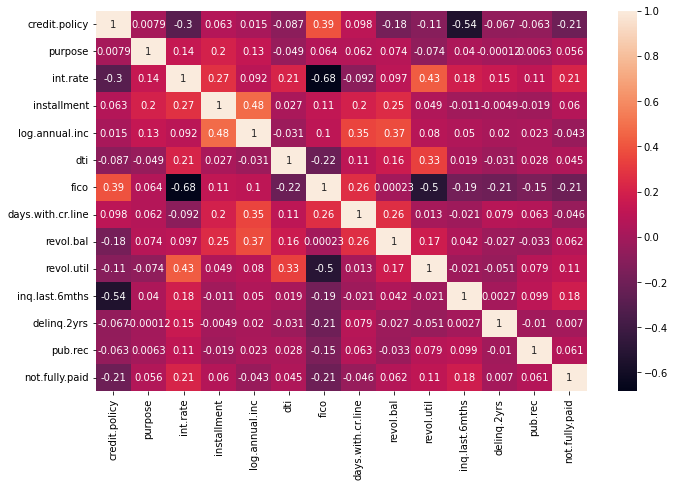

In [71]:
plt.figure(figsize=(11,7))
sns.heatmap(new_df.corr(), annot=True)

In [99]:
corrs = new_df.corr().abs()['not.fully.paid']
corrs.sort_values(ascending=False)

not.fully.paid       1.000000
credit.policy        0.214422
int.rate             0.213929
fico                 0.211363
inq.last.6mths       0.176828
revol.util           0.111286
revol.bal            0.061802
pub.rec              0.060690
installment          0.060353
purpose              0.055893
days.with.cr.line    0.045501
dti                  0.044822
log.annual.inc       0.042717
delinq.2yrs          0.006985
Name: not.fully.paid, dtype: float64

In [112]:
corrs[corrs < 0.8].index

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec'],
      dtype='object')

In [108]:
['int.rate','fico','credit.policy','inq.last.6mths','revol.util','installment','purpose','dti','pub.rec']

['int.rate',
 'fico',
 'credit.policy',
 'inq.last.6mths',
 'revol.util',
 'installment',
 'purpose',
 'dti',
 'pub.rec']

drop those features which have a strong correlation

In [119]:
X = new_df[corrs[corrs < 0.8].index]

In [120]:
y = new_df[['not.fully.paid']]

In [121]:
X

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
1378,1,3,0.0800,297.70,10.915088,3.53,787,14159.958330,7171,10.7,2,0,0
5880,1,2,0.0774,280.97,10.422638,15.10,782,10770.041670,8880,17.0,0,0,0
8138,0,6,0.1172,793.94,11.849398,8.39,707,5280.041667,16298,80.7,8,0,0
6826,1,2,0.1461,120.67,9.852868,5.24,662,3360.041667,1418,28.9,2,0,0
8578,0,4,0.1766,163.72,10.819778,24.46,647,5790.000000,16723,70.6,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3979,1,0,0.1284,47.07,8.494539,17.68,722,2100.000000,0,2.5,3,0,0
3198,1,2,0.1126,407.51,10.696390,7.96,722,3749.958333,12656,71.9,0,0,0
2861,1,0,0.1442,51.58,11.002100,12.04,667,3719.958333,2287,47.6,1,0,0
8918,0,6,0.1189,397.97,11.350407,7.31,722,4380.000000,29669,56.8,5,0,0


In [122]:
y

,not.fully.paid
1378,1
5880,1
8138,1
6826,1
8578,0
...,...
3979,0
3198,0
2861,1
8918,1


### train test split

In [123]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

### scaling

In [124]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

no scaling required for y as its binary

### Apply Model Building-ANN

In [125]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [232]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=[X.columns.size]))
model.add(Dropout(0.3))

model.add(Dense(256, activation='relu',))
model.add(Dropout(0.3))

# output layer
model.add(Dense(1, activation='sigmoid'))

In [233]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 256)               3584      
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 256)               65792     
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 1)                 257       
                                                                 
Total params: 69,633
Trainable params: 69,633
Non-trainable params: 0
_________________________________________________________________


In [234]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [235]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=20)

In [236]:
history = model.fit(X_train,y_train,
          epochs=500,
          batch_size=256,
          validation_data=(X_test,y_test),
          callbacks=early_stop
          )

Epoch 1/500
51/51 [==============================] - 1s 7ms/step - loss: 0.6495 - accuracy: 0.6185 - val_loss: 0.6355 - val_accuracy: 0.6349
Epoch 2/500
51/51 [==============================] - 0s 4ms/step - loss: 0.6353 - accuracy: 0.6360 - val_loss: 0.6313 - val_accuracy: 0.6417
Epoch 3/500
51/51 [==============================] - 0s 4ms/step - loss: 0.6319 - accuracy: 0.6381 - val_loss: 0.6244 - val_accuracy: 0.6442
Epoch 4/500
51/51 [==============================] - 0s 4ms/step - loss: 0.6288 - accuracy: 0.6414 - val_loss: 0.6239 - val_accuracy: 0.6405
Epoch 5/500
51/51 [==============================] - 0s 4ms/step - loss: 0.6253 - accuracy: 0.6430 - val_loss: 0.6209 - val_accuracy: 0.6436
Epoch 6/500
51/51 [==============================] - 0s 4ms/step - loss: 0.6216 - accuracy: 0.6502 - val_loss: 0.6202 - val_accuracy: 0.6405
Epoch 7/500
51/51 [==============================] - 0s 4ms/step - loss: 0.6209 - accuracy: 0.6513 - val_loss: 0.6164 - val_accuracy: 0.6457
Epoch 8/500
5

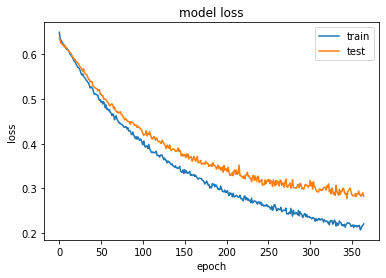

In [239]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

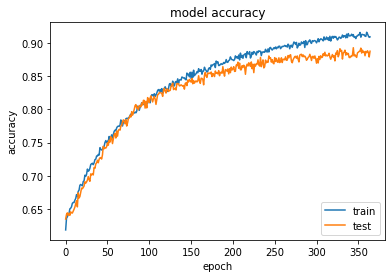

In [241]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

### Validation

In [ ]:
predictions = (model.predict(X_test) > 0.5).astype('int64')

101/101 [==============================] - 0s 1ms/step


In [ ]:
predictions

array([[1],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
accuracy_score(y_test,predictions)

0.8878185208203854

<AxesSubplot:>

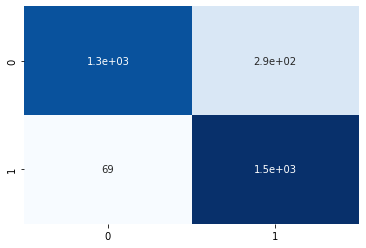

In [ ]:
sns.heatmap(confusion_matrix(y_test,predictions), annot=True, cbar=False, cmap='Blues',)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.82      0.88      1626
           1       0.84      0.96      0.89      1592

    accuracy                           0.89      3218
   macro avg       0.89      0.89      0.89      3218
weighted avg       0.90      0.89      0.89      3218



In [243]:
model.save('model1.h5')

### Hyperparameter tuning

In [1]:
from keras.layers import BatchNormalization
import keras.optimizers

In [251]:
def build_model(hp):
  model=Sequential()
  #first hidden layer
  model.add(Dense(units=hp.Int('units',min_value=32, max_value=1024,step=16),
                  activation=hp.Choice('activation',['relu','tanh']),input_shape=[X.columns.size]))
  model.add(BatchNormalization())
  model.add(Dropout(hp.Float('rate',min_value=0.1,max_value=0.5,step=0.1)))

  #second hidden layer
  model.add(Dense(units=hp.Int('units',min_value=32, max_value=1024,step=16),
                  activation=hp.Choice('activation',['relu','tanh'])))
  model.add(BatchNormalization())
  model.add(Dropout(hp.Float('rate',min_value=0.1,max_value=0.5,step=0.1)))

  #Third hidden layer
  model.add(Dense(units=hp.Int('units',min_value=32, max_value=1024,step=16),
                  activation=hp.Choice('activation',['relu','tanh'])))
  model.add(BatchNormalization())
  model.add(Dropout(hp.Float('rate',min_value=0.1,max_value=0.5,step=0.1)))

  #output layer
  model.add(Dense(1,activation='sigmoid'))

  #learning_rate
  learning_rate=hp.Float('learning_rate',min_value=0.001,max_value=0.1,step=0.01)
  
  # compile the model
  model.compile(loss='binary_crossentropy',
                optimizer=keras.optimizers.Adam(learning_rate),
                metrics=['accuracy'])
  return model

In [252]:
import keras_tuner as kt

In [253]:
build_model(kt.HyperParameters())

In [254]:
rtuner = kt.RandomSearch(hypermodel=build_model,
                       objective='val_accuracy',
                       max_trials=3,
                       executions_per_trial=2,
                       overwrite=True,
                       )

In [255]:
rtuner.search(X_train,y_train,epochs=20,validation_data=(X_test,y_test))

Trial 3 Complete [00h 02m 52s]
val_accuracy: 0.6587942838668823

Best val_accuracy So Far: 0.6587942838668823
Total elapsed time: 00h 08m 12s
INFO:tensorflow:Oracle triggered exit


In [267]:
best_hp = rtuner.get_best_hyperparameters()[0]
model_1 = rtuner.hypermodel.build(best_hp)

In [268]:
accuracy_score(y_test, (model_1.predict(X_test) > 0.5).astype('int64'))

101/101 [==============================] - 0s 3ms/step


0.5487880671224363